# Fashion classification

In [1]:
# connecting to https://github.com/alexeygrigorev/clothing-dataset-small and access to the train folder
# and download the images to the local machine
import numpy as np
import matplotlib.pyplot as plt
import os
import requests 
import re
import urllib.request
import urllib.parse
import matplotlib.pyplot as plt


In [2]:
from PIL import Image # python image library

In [3]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.1 Tensorflow and Keras

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
# load the images
from tensorflow.keras.preprocessing.image import load_img

In [9]:
path = './clothing-dataset-small/train/t-shirt'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

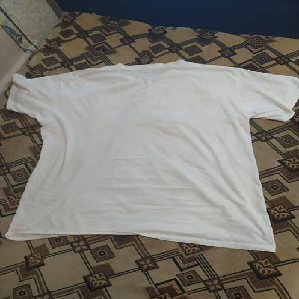

In [29]:
img

In [12]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 pre-trained convulotional neural networks

models created in keras.io

Xception is fast and accurate https://keras.io/api/applications/xception/

In [ ]:
keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="xception",
)

In [27]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions # decode the predictions

In [20]:
model = Xception(weights='imagenet' , input_shape=(299, 299, 3))


In [21]:
X = np.array([x])

In [22]:
X = preprocess_input(X)

In [25]:
pred = model.predict(X)

1/1 [==============================] - 0s 159ms/step


In [26]:
pred # the output is the probability of each class

array([[7.79549373e-06, 2.24676969e-05, 1.86893976e-05, 1.20043542e-05,
        3.43274987e-05, 4.67107348e-05, 1.64154717e-05, 6.52924382e-06,
        1.16982710e-05, 8.63575588e-06, 1.62400775e-05, 9.62266222e-06,
        5.37133201e-06, 1.11342770e-05, 7.90367085e-06, 1.57592294e-05,
        1.98552043e-05, 6.96682810e-06, 1.06662283e-05, 1.37064089e-05,
        6.35953984e-05, 7.11989060e-06, 2.08244146e-05, 8.57218947e-06,
        1.69317900e-05, 2.18108144e-05, 9.67478900e-06, 1.47072142e-05,
        2.69732191e-05, 2.08300935e-05, 1.96119290e-05, 1.57811864e-05,
        1.70845196e-05, 3.13309865e-05, 3.48267677e-05, 2.90186545e-05,
        1.64957437e-05, 2.12442719e-05, 2.11680708e-05, 9.63355160e-06,
        5.68349787e-06, 3.21380649e-05, 1.07036349e-05, 1.17406189e-05,
        2.57239899e-05, 3.02084845e-05, 1.00964435e-05, 1.01565802e-05,
        1.47668607e-05, 2.57436477e-05, 3.32666896e-05, 1.37164116e-05,
        2.48509787e-05, 3.22736050e-05, 1.22734637e-05, 1.816216

In [28]:
decode_predictions(pred) # the output is the class name and the probability

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.9533835),
  ('n04370456', 'sweatshirt', 0.009737043),
  ('n04033995', 'quilt', 0.0031156428),
  ('n03188531', 'diaper', 0.0011530996),
  ('n03710637', 'maillot', 0.0010664052)]]

as this model is very general and does not have tshirt, is not fittig our purpose

but we can built on top, not neccesary starting from scratch